<a href="https://colab.research.google.com/github/SagnikRahman/AI-Powered-Resume-Screening-Ranking-System/blob/main/AI_Powered_Resume_Screening_%26_Ranking_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary dependencies
!pip install streamlit PyPDF2 scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [2]:
%%writefile app.py
# Import necessary libraries
import streamlit as st
from PyPDF2 import PdfReader
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to Extract Text from a PDF Resume
def extract_text_from_pdf(file):
    """
    Reads and extracts text from a PDF file.

    :param file: Uploaded PDF file
    :return: Extracted text as a string
    """
    pdf = PdfReader(file)
    text = ""
    for page in pdf.pages:
        extracted = page.extract_text()
        if extracted:
            text += extracted + "\n"
    return text.strip()

# Function to Rank Resumes Based on Job Description
def rank_resumes(job_description, resumes):
    """
    Compares job description with resumes using TF-IDF vectorization
    and ranks them based on cosine similarity.

    :param job_description: String containing the job description
    :param resumes: List of resume texts extracted from PDFs
    :return: List of cosine similarity scores for each resume
    """
    # Combine job description and resume texts into a single document list
    documents = [job_description] + resumes

    # Convert text data into TF-IDF vectors
    vectorizer = TfidfVectorizer().fit_transform(documents)
    vectors = vectorizer.toarray()

    # Extract job description vector
    job_description_vector = vectors[0]

    # Extract resume vectors
    resume_vectors = vectors[1:]

    # Compute cosine similarity between job description and each resume
    cosine_similarities = cosine_similarity([job_description_vector], resume_vectors).flatten()

    return cosine_similarities

# Streamlit UI Configuration
st.set_page_config(page_title="Resume Ranking System", layout="wide")

# Custom Styling for Streamlit App
st.markdown(
    """
    <style>
        .stApp {
            background-color: #f4f4f4;
            font-family: 'Arial', sans-serif;
        }
        .main-title {
            color: #4CAF50;
            text-align: center;
            font-size: 32px;
        }
        .sub-header {
            color: #FF5733;
            font-size: 24px;
        }
        .stButton>button {
            background-color: #2196F3;
            color: white;
            border-radius: 10px;
            width: 100%;
            padding: 10px;
            font-size: 18px;
        }
        .stButton>button:hover {
            background-color: #0b7dda;
        }
        .stDataFrame {
            border-radius: 10px;
            border: 1px solid #ddd;
        }
    </style>
    """,
    unsafe_allow_html=True
)

# App Title and Description
st.markdown("<h1 style='color: black;'>📄 AI Resume Screening & Ranking System</h1>", unsafe_allow_html=True)
st.markdown("<h2 style='color: black;'>Upload Resumes and Get Rankings Based on Job Description</h2>", unsafe_allow_html=True)

# Sidebar Inputs - Job Description and Resume Upload
st.sidebar.header("🔍 Job Description")
job_description = st.sidebar.text_area("Enter job description", height=150)

st.sidebar.header("📂 Upload Resumes")
uploaded_files = st.sidebar.file_uploader("Upload PDF resumes", type=["pdf"], accept_multiple_files=True)

# Process and Rank Resumes When Button is Clicked
if st.sidebar.button("Rank Resumes"):
    if job_description and uploaded_files:
        with st.spinner("Processing Resumes..."):
            # Extract text from uploaded resumes
            resume_texts = [extract_text_from_pdf(file) for file in uploaded_files]

            # Rank resumes based on job description
            scores = rank_resumes(job_description, resume_texts)

            # Create results dataframe
            results = pd.DataFrame({
                "Resume": [file.name for file in uploaded_files],
                "Score": scores
            }).sort_values(by="Score", ascending=False)

            # Display ranking completion message
            st.markdown(
                "<div style='background-color: #d4edda; padding: 10px; border-radius: 5px; color: black; font-weight: bold;'>✅ Ranking Completed!</div>",
                unsafe_allow_html=True
            )

            # Display ranked resumes in tabular format
            st.dataframe(results.style.format({"Score": "{:.2f}"}))

    else:
        # Warning message if inputs are missing
        st.markdown(
            "<div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; color: black; font-weight: bold;'>⚠️ Please provide both a job description and resume files.</div>",
            unsafe_allow_html=True
        )

Writing app.py


In [3]:
# Running Streamlit App on Local Server
!pkill streamlit  # Stops any running Streamlit process
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏

⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.82.106:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://mean-bobcats-begin.loca.lt
  Stopping...
^C


***Output***

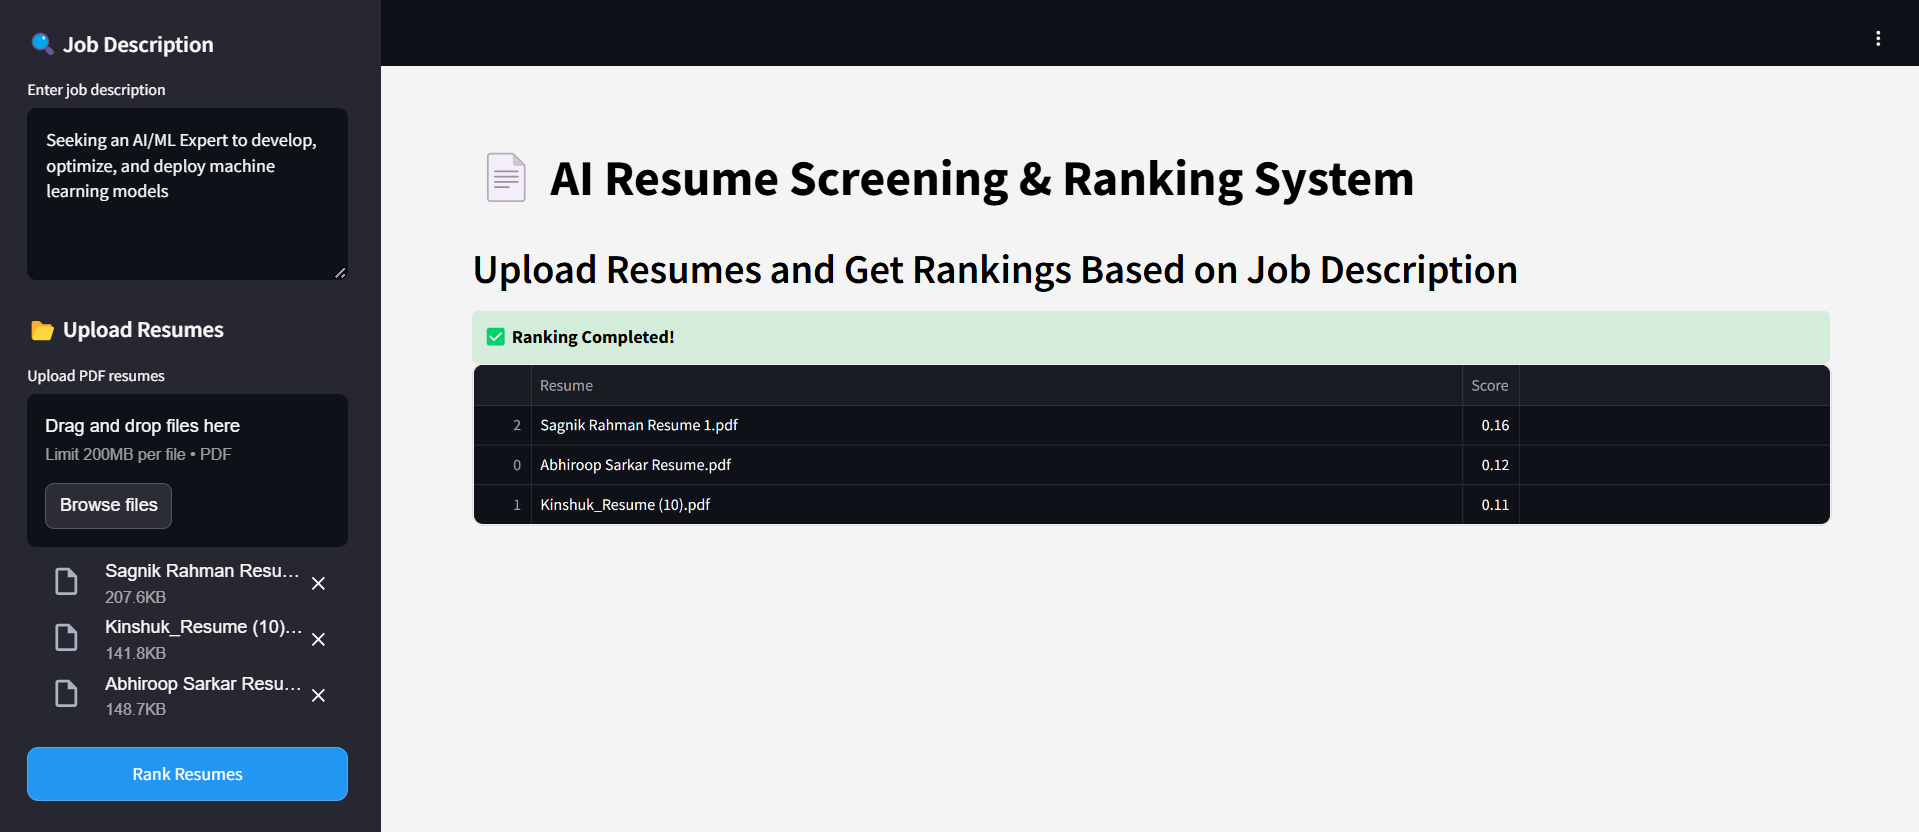